In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

sns.set_style("whitegrid")
mpl.rcParams["figure.figsize"] = (12, 6)

import warnings
warnings.filterwarnings("ignore")


# RNN AND LSTM

In [145]:
#TIME SERIES ANALYSIS

Y2 = Known + Unknown

Đưa input and output (i have to have) -> algorithm ( do not to specify specific recipe )


at-1 ảnh hưởng at nên bỏ nó vào hidden layer


(x-1,ht-2) = ht-1 , ht = (x1,ht-1)

In [146]:
#Why tanh

In [147]:
tanh = lambda x: np.tanh(x)
sigmoid = lambda x: 1 / (1 + np.exp(-x))
sigmoid_derivative = lambda x: x*(1-x)
tanh_derivative = lambda x: (1 - x**2)

0.9640275800758169
0.8807970779778823


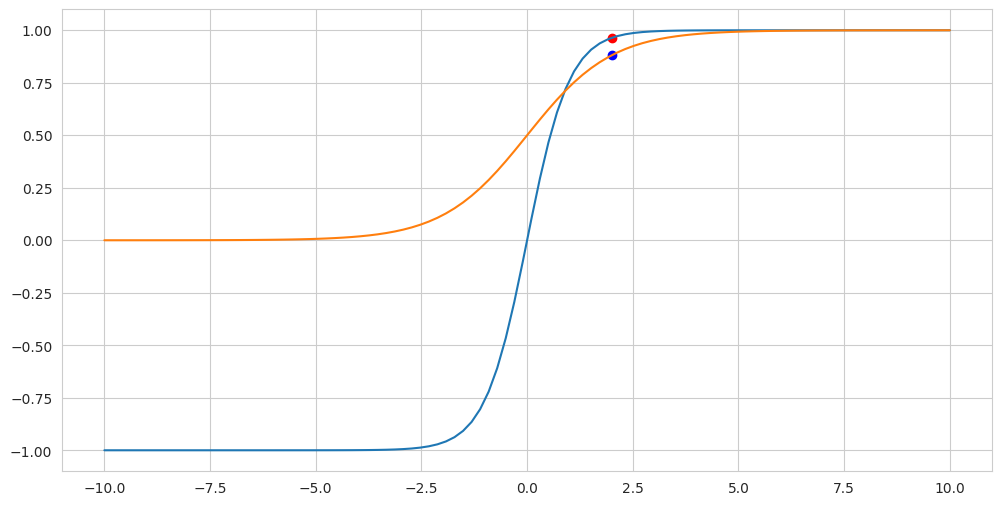

In [148]:
x = np.linspace(-10,10,100)
plt.plot(x,tanh(x)); # -1,1 , center around 0
plt.plot(x,sigmoid(x)); # output (0,1)
plt.scatter(2,tanh(2),color ='r');
plt.scatter(2,sigmoid(2),color ='b');
print(tanh(2))
print(sigmoid(2))

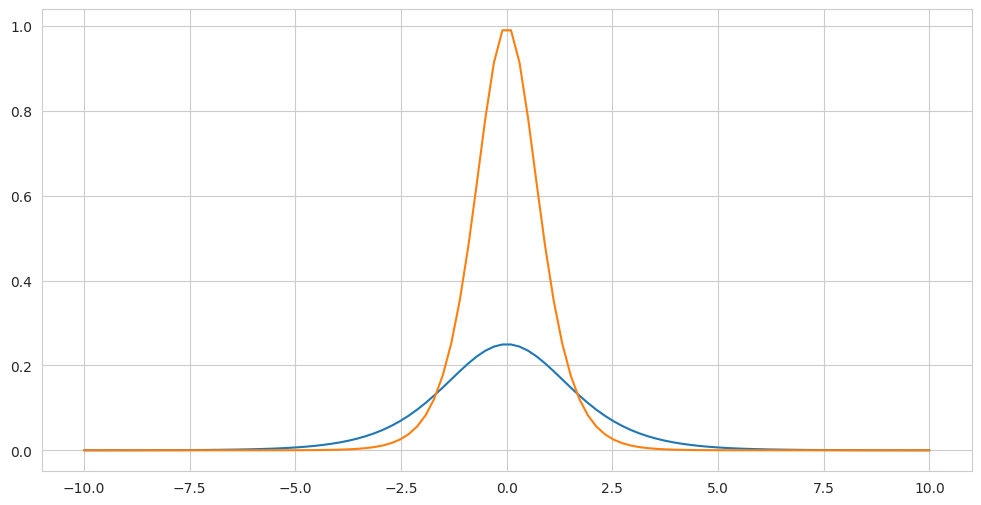

In [149]:
plt.plot(x,sigmoid(x)*(1-sigmoid(x)));
plt.plot(x,(1-tanh(x)**2)); # better for GD

#RNN -> VANISHING
#RNN

#Tensor
-T=3 -> many layer what if T = 10

In [150]:
import torch
x = torch.tensor(2.0,requires_grad=True)
y=x**2 + 2*x + 1
y.backward()
print(x.grad)

tensor(6.)


# most of time we work on tensorflow

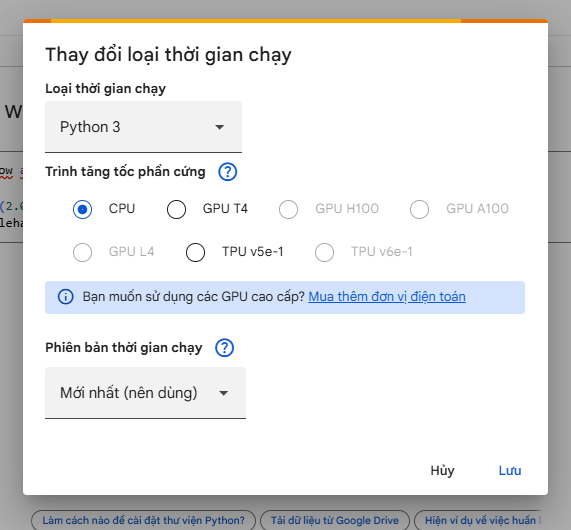

TPU là gì?

TPU (Tensor Processing Unit)

Chip chuyên dụng cho AI / Machine Learning (do Google thiết kế)

Tối ưu cho tensor & ma trận (nhân ma trận, backprop)

Rất nhanh khi train/infer mô hình lớn

👉 Ví dụ: train neural network trên Google Cloud / Colab TPU

In [151]:
import tensorflow as tf

x = tf.Variable(2.0)

with tf.GradientTape() as tape:
    y = x**2 + 2*x + 1

x_grad = tape.gradient(y, x)
print(x_grad)


tf.Tensor(6.0, shape=(), dtype=float32)


PyTorch: requires_grad=True + backward()

TensorFlow: tf.GradientTape() + tape.gradient()

#RNN
cross entropy and derivative of CE

In [152]:
def cross_entropy(y_true,y_pred):
  return -(y_true*np.log(y_pred + 1e-10)) + (1-y_true) * np.log(1-y_pred+1e-10)
def cross_entropy_derivative (y_true ,y_pred):
  return (y_true-y_pred) / (y_pred * (1-y_pred) + 1e-10)

In [153]:
np.random.seed(123)
x=np.array([1.0,0.0,1.0]).reshape(1,3)
x

array([[1., 0., 1.]])

#intialize the weights

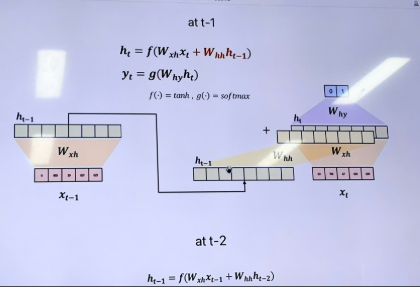

In [154]:
np.random.seed(123)
#intialize the weights
w_xh = np.random.rand(1,2)
w_hh = np.random.rand(2,2)
w_hy = np.random.rand(2,1)

In [155]:
w_xh,w_hh,w_hy

(array([[0.69646919, 0.28613933]]),
 array([[0.22685145, 0.55131477],
        [0.71946897, 0.42310646]]),
 array([[0.9807642 ],
        [0.68482974]]))

at time 0

In [156]:
print(x[:,0])
z0 = x[:,0] @ w_xh
print(z0)
h0 = tanh(z0)
print(h0)
y0 = sigmoid(h0 @ w_hy)
print(y0)

[1.]
[0.69646919 0.28613933]
[0.60212185 0.2785776 ]
[0.68596406]


at time 1

In [157]:
print(x[:,1])
z1 = x[:,1] @ w_xh + h0 @ w_hh
print(z1)
h1 = tanh(z1)
print(h1)
y1 = sigmoid(h1 @ w_hy)
print(y1)

[0.]
[0.33702015 0.44982665]
[0.32481452 0.4217565 ]
[0.64734699]


at time 2

In [158]:
print(x[:,2])
z2 = x[:,2] @ w_xh + h1 @ w_hh
print(z2)
h2 = tanh(z2)
print(h2)
y2 = sigmoid(h2 @ w_hy)
print(y2)

[1.]
[1.07359455 0.64366228]
[0.79081163 0.567388  ]
[0.7620885]


In [159]:
! pip install scikeras


In [160]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasRegressor

In [161]:
np.random.seed(123)
tf.random.set_seed(123)

In [162]:
timeseries_data = np.array([110., 125., 133., 146., 158., 172., 187., 196., 210., 211.]).reshape(-1, 1)
timeseries_data.shape

(10, 1)

In [163]:
timeseries_data # use 3 periods to predict the next

array([[110.],
       [125.],
       [133.],
       [146.],
       [158.],
       [172.],
       [187.],
       [196.],
       [210.],
       [211.]])

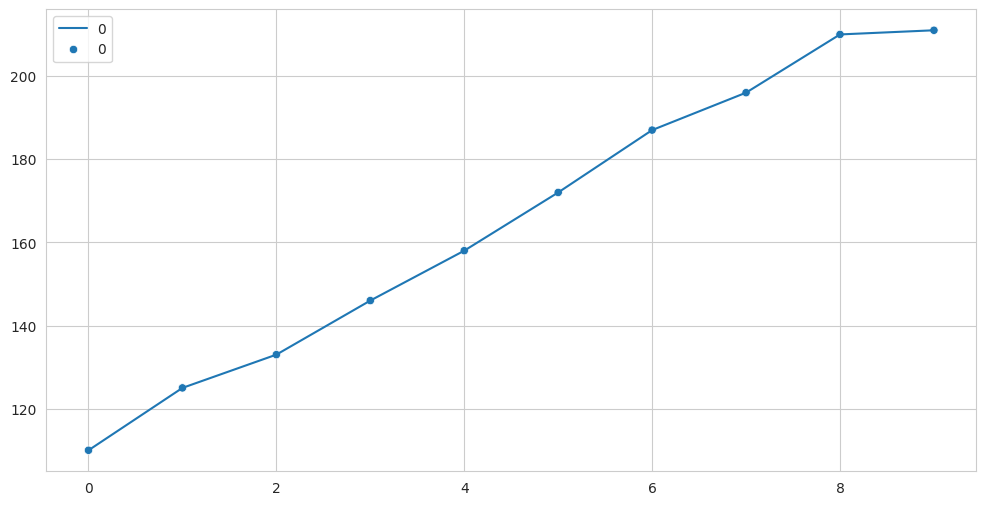

In [164]:
sns.lineplot(timeseries_data);
sns.scatterplot(timeseries_data);

In [165]:
#Choose a number of time steps (based on 3 previous data points, predict the next)
n_steps = 3

In [166]:
n_steps = 3

In [167]:
len(timeseries_data) - n_steps

7

[1,2,3] → dự đoán 4

[2,3,4] → dự đoán 5

[3,4,5] → dự đoán 6

[4,5,6] → dự đoán 7



In [168]:
m = np.arange(0,len(timeseries_data) - n_steps)
m

array([0, 1, 2, 3, 4, 5, 6])

In [169]:
X_train = np.array([timeseries_data[i: i+n_steps]for i in m])
X_train # the shape of X_train = 7

array([[[110.],
        [125.],
        [133.]],

       [[125.],
        [133.],
        [146.]],

       [[133.],
        [146.],
        [158.]],

       [[146.],
        [158.],
        [172.]],

       [[158.],
        [172.],
        [187.]],

       [[172.],
        [187.],
        [196.]],

       [[187.],
        [196.],
        [210.]]])

In [170]:
X_train.shape

(7, 3, 1)

In [171]:
y_train = np.array([timeseries_data[i+n_steps]for i in m])
y_train

array([[146.],
       [158.],
       [172.],
       [187.],
       [196.],
       [210.],
       [211.]])

In [172]:
y_train.shape

(7, 1)

In [173]:
def create_sequences(data,n_steps):
  X,y = [] , []
  for i in range(len(data)-n_steps):
    X.append(data[i: i+n_steps])
    y.append(data[i+n_steps])
  return np.array(X), np.array(y)

In [174]:
X,y = create_sequences(timeseries_data, n_steps)
X,y
# 211 is predict number

(array([[[110.],
         [125.],
         [133.]],
 
        [[125.],
         [133.],
         [146.]],
 
        [[133.],
         [146.],
         [158.]],
 
        [[146.],
         [158.],
         [172.]],
 
        [[158.],
         [172.],
         [187.]],
 
        [[172.],
         [187.],
         [196.]],
 
        [[187.],
         [196.],
         [210.]]]),
 array([[146.],
        [158.],
        [172.],
        [187.],
        [196.],
        [210.],
        [211.]]))

#Time series RNN model

In [175]:
timeseries_data = np.array([110., 125., 133., 146., 158., 172., 187., 196., 210., 211.]).reshape(-1, 1)

In [176]:
n_steps = 3

In [177]:
scaler = MinMaxScaler()
timeseries_data_scaled = scaler.fit_transform(timeseries_data)
timeseries_data_scaled

array([[0.        ],
       [0.14851485],
       [0.22772277],
       [0.35643564],
       [0.47524752],
       [0.61386139],
       [0.76237624],
       [0.85148515],
       [0.99009901],
       [1.        ]])

In [178]:
X,y = create_sequences(timeseries_data_scaled, n_steps)
X

array([[[0.        ],
        [0.14851485],
        [0.22772277]],

       [[0.14851485],
        [0.22772277],
        [0.35643564]],

       [[0.22772277],
        [0.35643564],
        [0.47524752]],

       [[0.35643564],
        [0.47524752],
        [0.61386139]],

       [[0.47524752],
        [0.61386139],
        [0.76237624]],

       [[0.61386139],
        [0.76237624],
        [0.85148515]],

       [[0.76237624],
        [0.85148515],
        [0.99009901]]])

In [179]:
y

array([[0.35643564],
       [0.47524752],
       [0.61386139],
       [0.76237624],
       [0.85148515],
       [0.99009901],
       [1.        ]])

In [180]:
n_features = 1
n_hidden = 4

model = Sequential()
model.add(SimpleRNN(n_hidden, return_sequences=True , activation='tanh', input_shape=(X.shape[1],1)))
model.add(Dropout(0.2))
model.add(SimpleRNN(n_hidden))

model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse',metrics=['mae'])

In [181]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_7 (SimpleRNN)        │ (None, 3, 4)           │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 3, 4)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_8 (SimpleRNN)        │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65 (260.00 B)

 Trainable params: 65 (260.00 B)

 Non-trainable params: 0 (0.00 B)

In [182]:
model.fit(X,y,batch_size=2,epochs=100)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.2792 - mae: 0.5228
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2141 - mae: 0.4515 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2174 - mae: 0.4258
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1881 - mae: 0.4138
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1298 - mae: 0.3535
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0787 - mae: 0.2462
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1331 - mae: 0.3368
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0344 - mae: 0.1545
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1373 - mae: 0.2666
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0221 - mae: 0.1368
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0445 - mae: 0.1864
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0559 - mae: 0.1951
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/st

In [183]:
dir(model.history)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_api_export_path',
 '_api_export_symbol_id',
 '_model',
 'epoch',
 'history',
 'model',
 'on_batch_begin',
 'on_batch_end',
 'on_epoch_begin',
 'on_epoch_end',
 'on_predict_batch_begin',
 'on_predict_batch_end',
 'on_predict_begin',
 'on_predict_end',
 'on_test_batch_begin',
 'on_test_batch_end',
 'on_test_begin',
 'on_test_end',
 'on_train_batch_begin',
 'on_train_batch_end',
 'on_train_begin',
 'on_train_end',
 'params',
 'set_model',
 'set_params']

In [184]:
model.history.history.keys()

dict_keys(['loss', 'mae'])

In [185]:
print(model.history.history['loss'])
print(model.history.history['mae'])

[0.2956901490688324, 0.2024812251329422, 0.2650339603424072, 0.1557859480381012, 0.14379189908504486, 0.08641000092029572, 0.1386410892009735, 0.033896710723638535, 0.10998717695474625, 0.01869179494678974, 0.036777932196855545, 0.04532686993479729, 0.02749088779091835, 0.027493590489029884, 0.06213817745447159, 0.010911949910223484, 0.09765847027301788, 0.0417785719037056, 0.22043825685977936, 0.05608957260847092, 0.03339020535349846, 0.03165939077734947, 0.010681847110390663, 0.13819661736488342, 0.04391668364405632, 0.028971632942557335, 0.06044713407754898, 0.029237572103738785, 0.017674358561635017, 0.02792268991470337, 0.021221410483121872, 0.03641289472579956, 0.02939382568001747, 0.05202260613441467, 0.020961280912160873, 0.07586395740509033, 0.03135499730706215, 0.0322461873292923, 0.020545748993754387, 0.10465297847986221, 0.14844095706939697, 0.04690909385681152, 0.058087851852178574, 0.05980101600289345, 0.025395851582288742, 0.027017327025532722, 0.02546425722539425, 0.013

Text(0.5, 1.0, 'mae')

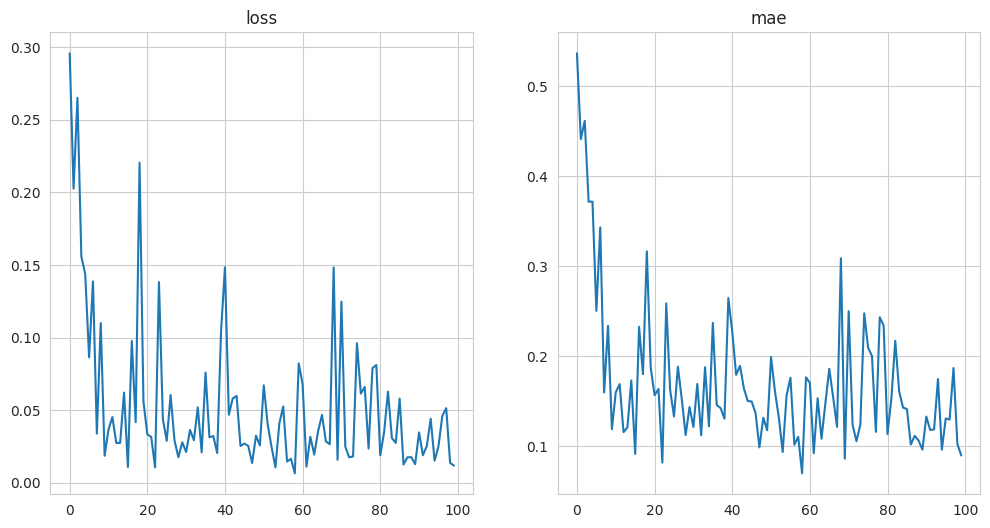

In [186]:
plt.subplot(1,2,1)
plt.plot(model.history.history['loss'])
plt.title('loss')
plt.subplot(1,2,2)
plt.plot(model.history.history['mae'])
plt.title('mae')


In [187]:
timeseries_data[-3:].shape #reshape

(3, 1)

In [188]:
last_X = timeseries_data_scaled[-n_steps:].reshape(1,n_steps, 1)
last_X.shape

(1, 3, 1)

In [189]:
# we put 3 -> predict 1
# 1 -> 3 one to many
# 3 -> 3 many to many

#Prediction


In [190]:
last_X = timeseries_data_scaled[-n_steps:].reshape(1,n_steps, 1)

In [191]:
y_pred = model.predict(last_X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


In [192]:
y_pred

array([[1.043472]], dtype=float32)

#Many to One prediction

In [198]:
y_orin=scaler.inverse_transform(y_pred)
print(timeseries_data[-10:])
print(y_orin)


[[110.]
 [125.]
 [133.]
 [146.]
 [158.]
 [172.]
 [187.]
 [196.]
 [210.]
 [211.]]
[[223.19348]]


#MANY TO MANY PREDICTION

In [199]:
n_forecast = 4

last_X = timeseries_data_scaled[-n_steps:].reshape(1, n_steps, 1)

forecast = []
forecast_inv = []

for _ in range(n_forecast):
    y_pred = model.predict(last_X, verbose=0)
    y_pred_inv = scaler.inverse_transform(y_pred)

    forecast.append(y_pred[0])
    forecast_inv.append(y_pred_inv[0])

    new_sq = np.r_[last_X[0, 1:, 0], y_pred[0]]
    last_X = new_sq.reshape(1, n_steps, 1)


In [200]:
print(np.array(forecast))
print(np.array(forecast_inv))

[[1.043472 ]
 [1.1088837]
 [1.1004939]
 [1.1207277]]
[[215.39069]
 [221.99725]
 [221.14989]
 [223.19348]]


#NPNG
predict gold price

In [201]:
import yfinance as yf

df = yf.download('GLD',period='5y',progress=False)['Close']


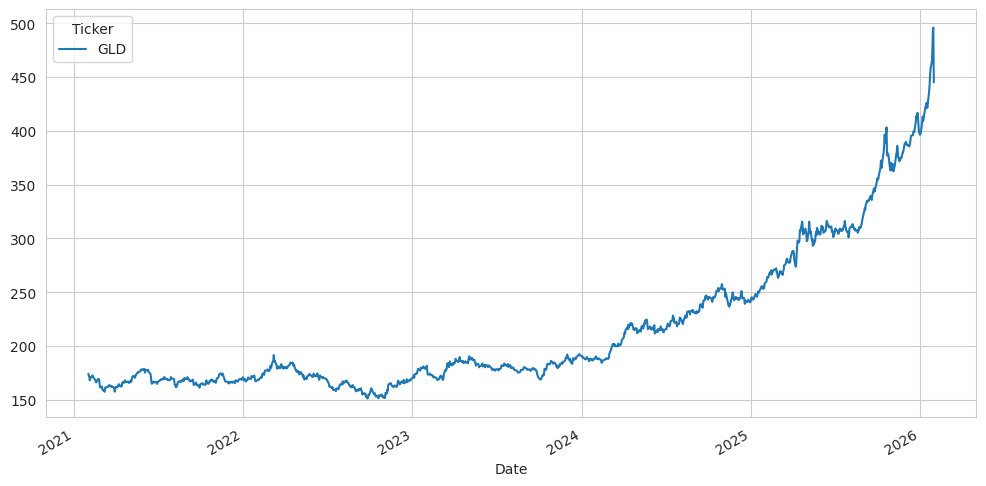

In [202]:
df.plot();

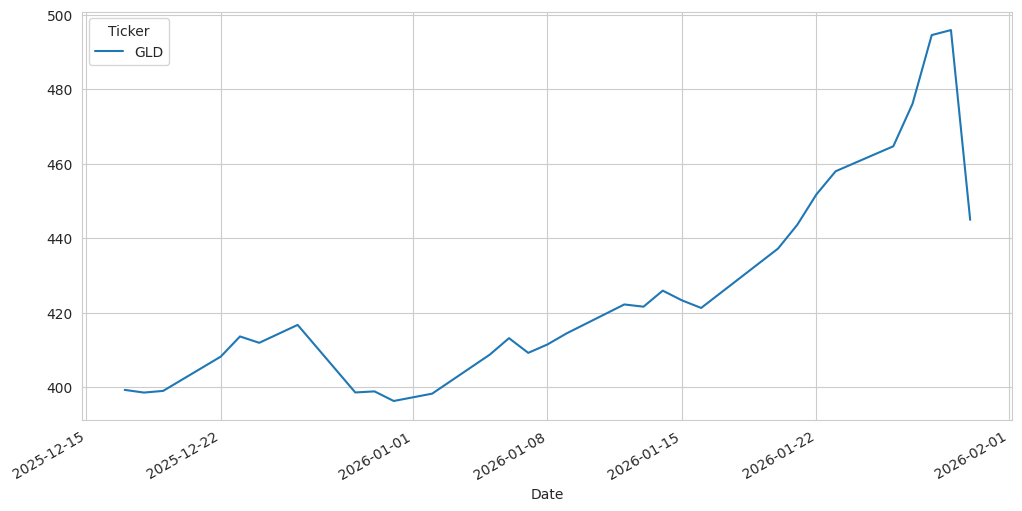

In [204]:
df.tail(30).plot();

In [206]:
df.pct_change().min() * 100

,0
Ticker,
GLD,-0.102742


# tai sao gia vang giam